# Опросы

## Свертка

In [42]:
import numpy as np
import pandas as pd

In [43]:
X = np.array([
    [1,2,3,1],
    [1,4,0,0],
    [2,2,0,2],
    [0,4,1,3]])

W = np.array([
    [1,2,0],
    [0,3,0]])  

In [44]:

def conv_2D(X,W):
  res_list = np.array([])
  for str in range(X.shape[0]-W.shape[0]+1):
    for el in range(X.shape[1]-W.shape[1]+1):
      temp_matrix = X[str:str+W.shape[0], el:el+W.shape[1]]
      res_list = np.append(res_list, np.sum(temp_matrix * W))
  return res_list.reshape(X.shape[0]-W.shape[0]+1, X.shape[1]-W.shape[1]+1)


In [45]:
conv_2D(X, W)

array([[17.,  8.],
       [15.,  4.],
       [18.,  5.]])

In [46]:
X = np.array([
    [1,2,3,1],
    [1,4,0,0],
    [2,2,0,2],
    [0,4,1,3]])

W = np.array([
    [1,2,0],
    [0,3,0]])  

In [47]:
def conv_2D(X, W, padding=1, strides = 2):
  x = X.shape
  w = W.shape
  output = [int((x[0]-w[0]+2*padding)/strides)+1, int((x[1]-w[1]+2*padding)/strides)+1]
  res_list = np.array([])
  if padding != 0:
    X_padded = np.zeros((x[0]+2*padding, x[1]+2*padding))
    X_padded[padding:-padding, padding:-padding] = X
  else:
    X_padded = X
  for str in range(0, output[0]):
    if str > (x[0] - w[0]): 
      break
    if str % strides == 0:
      for el in range(0, output[1]):
        if el > x[1] - w[1]:
          break
        if el % strides == 0:
          temp_matrix = X_padded[str:str+w[0], el:el+w[1]]
          print(temp_matrix)
          res_list = np.append(res_list, np.sum(temp_matrix * W))
    return res_list
  # return res_list.reshape(output[0], output[1])

In [48]:
def conv_2D(X,W, padding=0, strides=1):
  # Для краткости записи создадим переменные, хранящие размерности матриц X и W
  x = X.shape
  w = X.shape
  # Вычислим размерность матрицы результата
  output = [int((x[0]-w[0]+2*padding)/strides)+1, int((x[1]-w[1]+2*padding)/strides)+1]
  # Инициализируем нулями матрицу результат
  output_matrix = np.zeros((output[0], output[1]))
  # Добавляем padding
  if padding != 0:
      X_padded = np.zeros((m + padding*2, n + padding*2))
      X_padded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = X
  else:
      X_padded = X
  # Идем по столбцам матрицы X фильтром
  for y in range(n):
    if y > (n - k): 
      break
        # Выполняем свертку, только если y ушел вниз в соответствии со strides
    if y % strides == 0:
        for x in range(m):
            # Идем к следующей строке если закончили на этой
            if x > m - r:
                break
            try:
                # Выполняем свертку, только если x ушел вправо в соответствии со strides
                if x % strides == 0:
                    output[x, y] = (W * X_padded[x: x + r, y: y + k]).sum()
            except:
                break
  return output

In [49]:
conv_2D(X, W, padding=1, strides = 2)

NameError: ignored

## Dogs vs Cats

In [ ]:
#!pip install numpy tensorflow tensorflow_datasets matplotlib

In [ ]:
!pip install -q opendatasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFile
import os, random, shutil
import zipfile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
od.download(
    "https://www.kaggle.com/competitions/dogs-vs-cats")

# {"username":"daryaami","key":"304b3404654c192ec66944de82362b38"}

In [ ]:
!unzip /content/dogs-vs-cats/train.zip -d /content/

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

original_folder = 'train/'
for i in range(9):
  pyplot.subplot(331 + i)
  filename = original_folder + 'dog.' + str(i) + '.jpg'
  plt.axis("off")
  image = imread(filename)
  pyplot.imshow(image)
pyplot.show()

In [ ]:
from os import listdir, path
len(listdir('/content/train'))

Мы будем использовать `ImageDataGenerator` из библиотеки Keras, чтобы сформировать из изображений необходимые нам наборы данных. Для этого создадим следующую структуру каталогов.
```
classifier_data
├── test
│   ├── cats
│   └── dogs
├── train
│   ├── cats
│   └── dogs
└── validation
    ├── cats
    └── dogs    
```

In [ ]:
home_dir = 'classifier_data'
os.makedirs(home_dir, exist_ok = True)
samples_list = ['train', 'test', 'validation']
categories_list = ['cats', 'dogs']
for sample_name in samples_list:
  for category_name in categories_list:
    os.makedirs(path.join(home_dir, sample_name, category_name), exist_ok = True)

In [ ]:
train_files_volume = 6000
validation_files_volume = 1000
test_files_volume = 1000

for item in listdir(original_folder):
  number = int(item.split('.')[1])
  name = item.split('.')[0]+'s'
  if number < train_files_volume:
    shutil.copy(path.join(original_folder, item), path.join('/content/classifier_data/train', name, item))
  if train_files_volume <= number < train_files_volume + validation_files_volume:
    shutil.copy(path.join(original_folder, item), path.join('/content/classifier_data/validation', name, item))
  if train_files_volume + validation_files_volume <= number < train_files_volume + validation_files_volume + test_files_volume:
    shutil.copy(path.join(original_folder, item), path.join('/content/classifier_data/test', name, item))

Проверим что все коты и собаки на месте

In [ ]:
print("Train:      котов {}, собак {}".format(len(listdir('/content/classifier_data/train/cats')), len(listdir('/content/classifier_data/train/dogs'))))
print("Validation: котов {}, собак {}".format(len(listdir('/content/classifier_data/validation/cats')), len(listdir('/content/classifier_data/validation/dogs'))))
print("Test:       котов {}, собак {}".format(len(listdir('/content/classifier_data/test/cats')), len(listdir('/content/classifier_data/test/dogs'))))

### Гиперпараметры

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
img_width, img_height = 150, 150 # ширина, высота изображений

train_data_dir = '/content/classifier_data/train' # директория с изображениями кошек и собак для последующего обучения модели
validation_data_dir = '/content/classifier_data/validation' # директория с изображениями для валидации модели
test_data_dir = '/content/classifier_data/test' # директория с изображениями для тестирования модели

nb_train_samples = train_files_volume * 2
nb_validation_samples = validation_files_volume * 2
nb_test_samples = test_files_volume * 2
batch_size = 32 # данные разбиваются на "пакеты" размером "batch_size"

Воспользуемся `ImageDataGenerator` и командой `.flow()`. Мы будем использовать только некоторые преобразования в рамках аугментации. Документация по модулю [доступна тут.](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Создадим отдельные генераторы для `train`, `validation` и `test`.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary',
    shuffle=False) #Сохраняет последовательность файлов из папки

### Обучение и оценка модели

In [ ]:
img = train_generator[0][0][30]
plt.axis('off')
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
if K.image_data_format() == 'channels_first': # для сохранения упорядочевания весов при переключении модели с одного формата данных на другой
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

epochs = 12 # количество эпох обучения

model = Sequential() 

model.add(Conv2D(32, (3, 3), input_shape=input_shape)) # добавляем сверточный 2D-слой. Поскольку это 1-ый слой, необходимо задать ключевой аргумент input_shape
# 32 - количество выходных фильтров в свертке, т.е. сколько признаков будем искать 
# (3, 3) - kernel_size-высота и ширина окна 2D свертки
# Имеется 32 фильтра, каждый 3x3x3 (т. е. 27 весов), плюс 1 для смещения (т. е. всего 28 весов каждый). 32 фильтра * 28 весов = 896 параметров.
model.add(Activation('relu')) # указываем функцию активации. В данном случае f(z)=max(0,z)
model.add(MaxPooling2D(pool_size=(2, 2))) # используем pooling

model.add(Conv2D(32, (3, 3))) # добавляем второй сверточный слой
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) # добавляем третий сверточный слой (размер фильтра увеличивается, так что сеть уже может изучать более сложные представления)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # слой, преобразующий 2D-данные в 1D-данные
model.add(Dense(128)) # добавляем полносвязный слой с указанием числа выходов
model.add(Activation('relu'))
model.add(Dropout(0.25)) # добавляем слой, обнуляющий в модели часть весов, чтоб избежать переобучения (0,5 означает, что он отбрасывает 50% существующих соединений)
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучение

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([min(history.history['loss'])-0.1, max(history.history['loss'])+0.1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

По графику видно, что в переобучение мы скатиться не успели, а результаты преодолевают проходной порог задания. Можно попробовать увеличить число эпох и оценить результаты.

Выполним предсказания для тестового набора данных и оценим качество нашей модели.

In [ ]:
imgs,labels = test_generator.next()
predictions = np.round(model.predict(imgs)).astype(int)
probabilities = model.predict(imgs)

from sklearn.metrics import classification_report
print(classification_report(labels, predictions, digits=3))

### Предсказания для тестовых данных из задания. 


### Тестовые данные итоговые

In [ ]:
!unzip /content/dogs-vs-cats/test1.zip -d /content/

len(listdir('/content/test1'))

test_predict_dir = 'test_predict'
os.makedirs(test_predict_dir, exist_ok = True)
test_predict_volume = 100

for idx in range(1, test_predict_volume+1):
  shutil.copy(path.join('test1', str(idx)+'.'+'jpg'), path.join(test_predict_dir, str(idx)+'.'+'jpg'))

In [ ]:
lsorted = sorted(listdir('/content/test_predict'), key=lambda x: int(os.path.splitext(x)[0]))
lsorted

Считаем изображения при помощи библиотеки CV2, изменим их размер и масштабируем.

In [ ]:
import cv2

for_pred_imgs = []

for name in lsorted:
  img = cv2.imread(path.join('/content/test_predict/', name))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (img_width, img_height)) / 255
  for_pred_imgs.append(img)

probs = model.predict(np.array(for_pred_imgs))
predictions = [1 if x > 0.5 else 0 for x in probs]
print(predictions)

### Последняя проверка

In [ ]:
lsorted = listdir('/content/final_test')
y_true = [0,0,1,0,0,1,0]
lsorted

In [ ]:
for_pred_imgs = []

for name in lsorted:
  img = cv2.imread(path.join('/content/final_test/', name))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (img_width, img_height)) / 255
  for_pred_imgs.append(img)

probs = model.predict(np.array(for_pred_imgs))
predictions = [1 if x > 0.5 else 0 for x in probs]
print(predictions)

In [ ]:
predict_mapped = pd.Series(predictions).map({0: 'doggy', 1: 'kitty'})

In [ ]:

figure(figsize=(20, 10), dpi=80)

for i in range(len(lsorted)):
  plt.subplot(331+i)
  img = cv2.imread('/content/final_test/'+lsorted[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.axis('off')
  plt.text(30, -20, predict_mapped[i], fontsize=15)
  plt.imshow(img)
plt.show()


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, predictions)

In [ ]:
img = Image.open('/content/final_test/'+lsorted[0])
img.show()

# Упражнение 11

In [50]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cpu()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
#model

In [52]:
!gdown 14CSVdok0NTd9NRHKv2WXg34Z7Wykui8A
image_file = '/content/sheep.jpg'

Downloading...
From: https://drive.google.com/uc?id=14CSVdok0NTd9NRHKv2WXg34Z7Wykui8A
To: /content/example_image.jpg
100% 164k/164k [00:00<00:00, 78.2MB/s]


In [53]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cpu()
output = model([image_tensor])[0]
print('Время распознавания: %.3fs' % (time.time() - t))

Время распознавания: 7.291s


In [54]:
image_tensor

tensor([[[0.7882, 0.7843, 0.7843,  ..., 0.8118, 0.8078, 0.8078],
         [0.7804, 0.7804, 0.7804,  ..., 0.7961, 0.7882, 0.7922],
         [0.7843, 0.7843, 0.7843,  ..., 0.7882, 0.7804, 0.7765],
         ...,
         [0.2863, 0.3843, 0.4275,  ..., 0.4941, 0.3137, 0.2588],
         [0.3569, 0.3333, 0.3490,  ..., 0.4392, 0.3804, 0.4353],
         [0.4235, 0.3176, 0.4235,  ..., 0.4353, 0.4549, 0.3333]],

        [[0.8588, 0.8549, 0.8549,  ..., 0.8627, 0.8588, 0.8627],
         [0.8510, 0.8510, 0.8510,  ..., 0.8431, 0.8431, 0.8471],
         [0.8549, 0.8549, 0.8549,  ..., 0.8431, 0.8353, 0.8392],
         ...,
         [0.3333, 0.4275, 0.4627,  ..., 0.5059, 0.3569, 0.3059],
         [0.4078, 0.3765, 0.3843,  ..., 0.4471, 0.4118, 0.4745],
         [0.4627, 0.3608, 0.4627,  ..., 0.4392, 0.4745, 0.3647]],

        [[0.9137, 0.9098, 0.9020,  ..., 0.8980, 0.8941, 0.8980],
         [0.9059, 0.9059, 0.8980,  ..., 0.8902, 0.8863, 0.8902],
         [0.9098, 0.9098, 0.9020,  ..., 0.8863, 0.8863, 0.

In [55]:
output

{'boxes': tensor([[581.2200, 236.8742, 625.7529, 299.5312],
         [502.9893, 228.2094, 542.1439, 287.7947],
         [394.1154, 221.1135, 430.3045, 275.6331],
         [449.5008, 227.7936, 495.4509, 288.8449],
         [221.7532, 216.0208, 274.5933, 262.4096],
         [ 38.6469, 185.9673,  71.7167, 229.7043],
         [250.0554, 197.5573, 283.0457, 234.7166],
         [330.2967, 220.4742, 362.3218, 270.1402],
         [ 60.2893, 179.4846,  88.9501, 211.8693],
         [306.6005, 214.0108, 341.9433, 259.7269],
         [192.9911, 201.8670, 225.9837, 247.9080],
         [107.9859, 175.3360, 130.6883, 209.5294],
         [124.1074, 179.1873, 156.3139, 213.6342],
         [ 82.5704, 176.5878, 111.8224, 211.1454],
         [293.2299, 199.7429, 323.8792, 238.4265],
         [176.1744, 188.7043, 203.4955, 226.7766],
         [200.4483, 187.9664, 227.9975, 216.1294],
         [157.4162, 180.9153, 191.4420, 220.8036],
         [432.3566, 176.3851, 450.1463, 187.1675],
         [300.7489, 20

В качестве результата возвращается словарь со следующими ключами:

Результаты работы модели находятся в словаре:

*   boxes -- bounding boxes обнаруженных объектов (в виде <code>x1, y1, x2, y2</code> — отсчет начинается от левого верхнего края изображения)
*   labels -- метки назначенных классов
*   scores -- вероятности отнесения к назначенным классам
*   masks -- маски -- результат сегментации

Обратим внимание на то, что значения интенсивностей пикселей масок и координаты коробок (bounding boxes) не являются целыми числами. В дальнейшем, исправим это.

In [56]:
output.keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [57]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

Произведем небольшое преобразование, а именно -- отберем только те обнаруженные объекты, в которых модель относительно уверена (значение score больше 0.5), произведем бинаризацию значений масок и актуализируем значения bounding boxes.

In [58]:
result = {}
result['masks'] = []
result['labels'] = []
result['scores'] = []
result['boxes'] = []

for i in range(len(output['scores'])):
  if output['scores'][i] <= 0.5:
    continue
  # Исправляем маски
  one_mask = output['masks'][i][0].cpu().numpy()
  one_mask[one_mask >= np.max(one_mask) * 0.5] = 1
  one_mask[one_mask < np.max(one_mask) * 0.5] = 0
  result['masks'].append(one_mask)
  # Исправляем коробки
  result['boxes'].append(output['boxes'][i].int().cpu().numpy())
  # Добавляем остальное
  result['scores'].append(output['scores'][i].cpu().numpy())
  result['labels'].append(output['labels'][i].cpu().numpy())

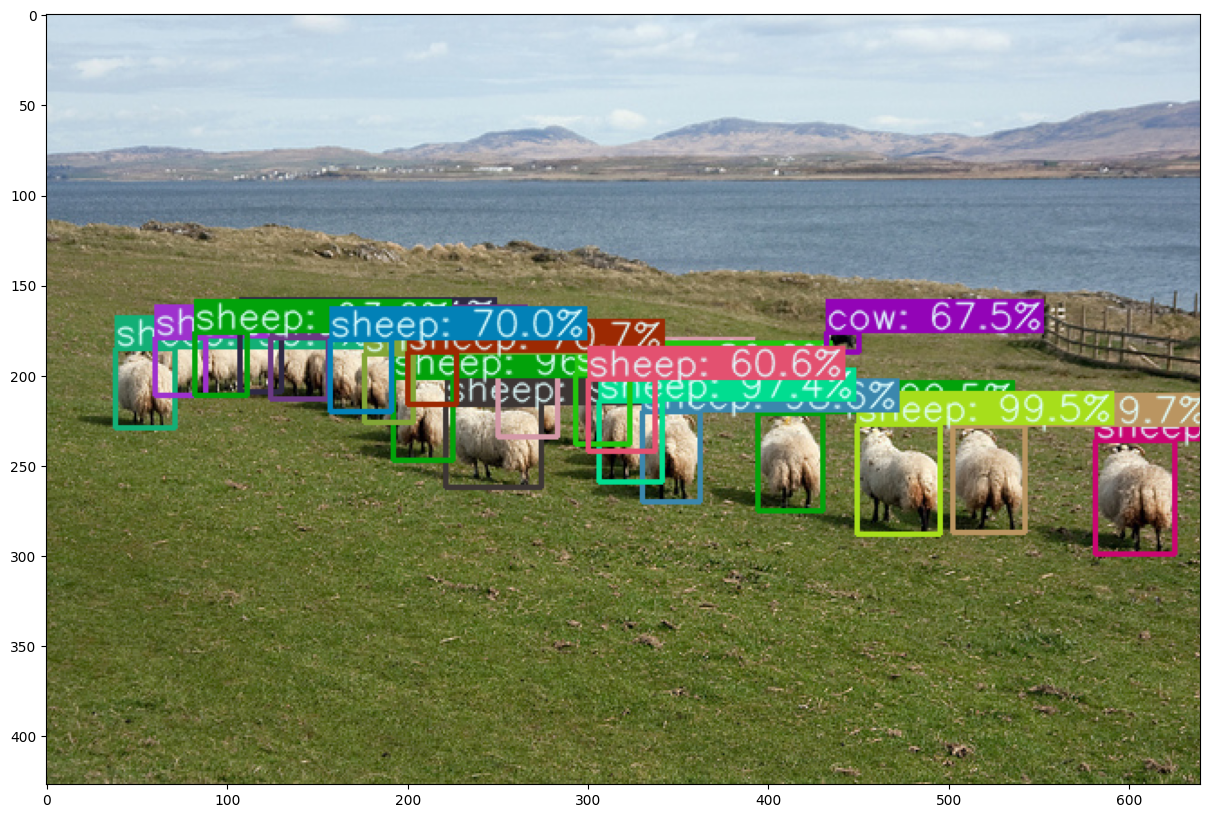

In [59]:
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(image.copy())
for box, label, score, mask in zip(result['boxes'], result['labels'], result['scores'], result['masks']):
  color = random.choice(colors)
  
  # draw box
  tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
  c1, c2 = (box[0], box[1]), (box[2], box[3])
  cv2.rectangle(result_image, c1, c2, color, thickness=tl)
  # draw text
  display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
  tf = max(tl - 1, 1)  # font thickness
  t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
  c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
  cv2.rectangle(result_image, c1, c2, color, -1)  # filled
  cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
  
plt.figure(figsize=(15, 10))
plt.imshow(result_image)

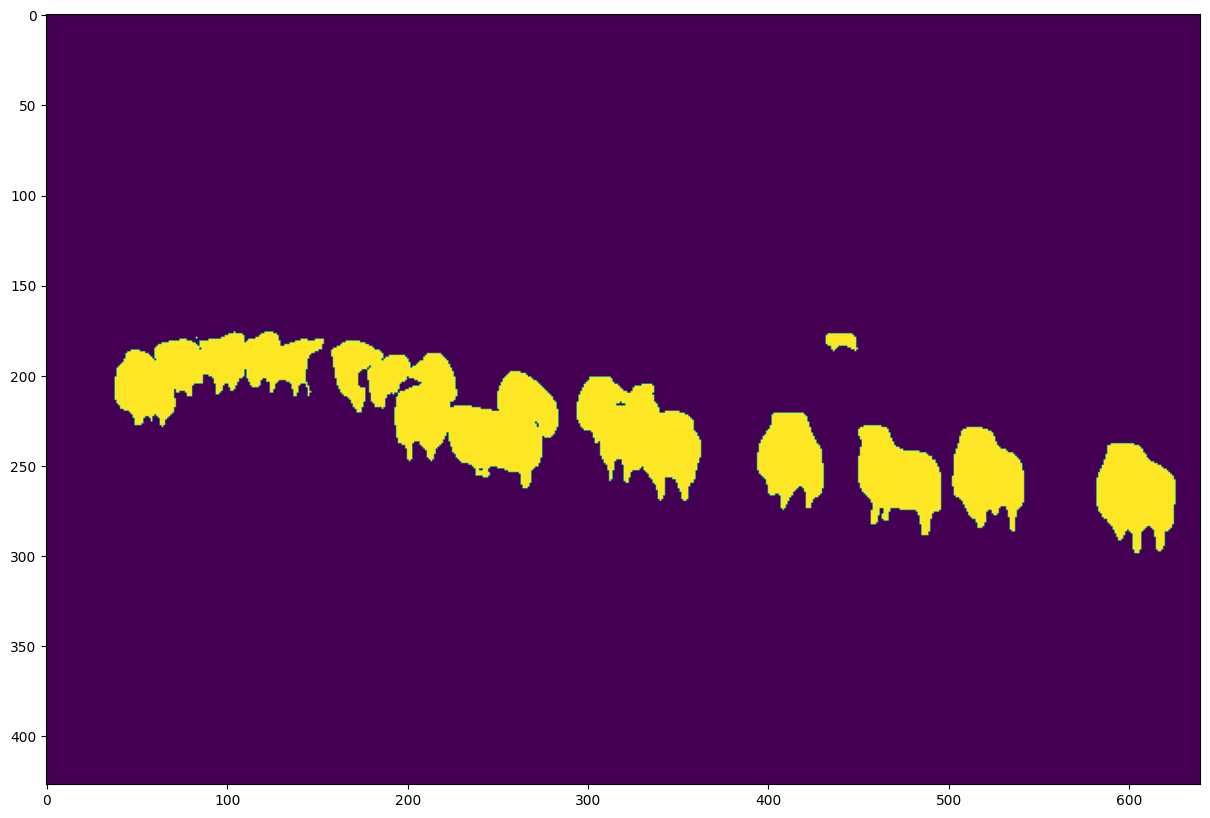

In [60]:
all_masks = np.sum(result['masks'],axis=0)
all_masks[all_masks > 1] = 1
plt.figure(figsize=(15, 10))
plt.imshow(all_masks)

In [75]:
result['masks']

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],


In [79]:
list_mask = []
for i in range(len(result['masks'])):
  list_mask.append(result['masks'][i].mean())

In [80]:
arr_mask = np.array(list_mask)

In [88]:
biggest_object_idx = arr_mask.argmax()

In [89]:
biggest_object_idx

0

In [90]:
biggest_object_score = result['scores'][biggest_object_idx]

In [87]:
image_size = image.size

In [92]:
object_size = result['masks'][biggest_object_idx].sum()
object_size

1874.0

In [93]:
object_to_img_ratio = object_size / np.multiply(*image_size)

In [95]:
object_to_img_ratio

0.0068574355971896955

In [98]:
coco_names[result['labels'][biggest_object_idx]]

'sheep'

In [102]:
x_l_up, y_l_up, x_r_down, y_r_down = result['boxes'][biggest_object_idx]

In [103]:
x_l_up, y_l_up

(581, 236)

In [107]:
width_in_px = x_r_down - x_l_up
height_in_px = y_r_down - y_l_up

In [108]:
width_in_px, height_in_px

(44, 63)